# **Prueba Técnica para operador de Inteligencia Artificial**

***

**Mario Salas**

<p align="center">
<img src="images\th.jpeg" alt="Texto alternativo" width="500" height="500">
</p>

## **Resumen:**

### Este documento pretende mostrar la manera que he pensado en satisfacer la necesidad de automatizar el enriquecimiento de información utilizando IA generativa y apoyándome en un LLM como el Gemini

### Este notebook contiene varios scripts y uso de librerías que facilitan el uso y ecceso a algoritmos, así como la comunicación con APIs

### Se intentará documentar cada paso dado para la fácil implementación y utilización

# Análisis exploratorio de datos

Importaremos las librerías necesarias para este proyecto

In [1]:
import pandas as pd
import os
import shutil
import requests
from pathlib import Path

Vamos a jugar con algunos parámetros de pandas para mejorar la visibilidad de las tablas

In [2]:
# pd.set_option('display.max_colwidth', None)  # Mostrar todo el contenido de las celdas
# pd.set_option('display.max_rows', None)  # Mostrar todas las filas
# pd.set_option('display.max_columns', None)  # Mostrar todas las columnas

Leemos los archivos csv

In [3]:
product_df = pd.read_csv('product-data.csv')
images_df = pd.read_csv('product-images.csv')

Primero vamos a echarle un vistazo a nuestros dataframes

In [4]:
product_df

,sku,view,channel,template,name
0,99739196,ES,Tienda de Demos,Decor Products,"""Bolsa de Arroz Étnica"""
1,C-161260-Arena,ES,Tienda de Demos,Decoracion,Arena Retro Café
2,C-161260-Azúl pastel,ES,Tienda de Demos,Decoracion,Cafetera Retro Azul
3,C-161260-Blanco roto,ES,Tienda de Demos,Decoracion,Cafetera EcoRetro - Blanco Crema
4,C-161260-Negro,ES,Tienda de Demos,Decoracion,Cafetera Express Thera\t\n\n
5,C-161260-Rojo,ES,Tienda de Demos,Decoracion,Cafetera EcoRetro Roja
6,C-161260-Rosa pastel,ES,Tienda de Demos,Decoracion,Cafetera Retro Rosa Sueño
7,C-161260-Sage,ES,Tienda de Demos,Decoracion,Cafetera Express Verde THERA Retro
8,C-161260-Verde pastel,ES,Tienda de Demos,Decoracion,Green Barista Retro
9,C-162778,ES,Tienda de Demos,Decoracion Ventilador,BreezeLuz Ecofan


In [5]:
images_df

,sku,url,filename,template,position,is_main_image,view,channel
0,DALI_CRU,https://demo.ui.smartie.io/medias/image/e95c/D...,DALI_CRU_1_1.jpg,Shopify Media Template,1,False,ES,Tienda de Demos
1,S-226841-blanco-roto,https://demo.ui.smartie.io/medias/image/66b0/f...,fridge-retro-281l-frigorifico-de-estilo-retro-...,Shopify Media Template,1,True,ES,Tienda de Demos
2,S-226841-negro,https://demo.ui.smartie.io/medias/image/881e/f...,fridge-retro-281l-frigorifico-de-estilo-retro....,Shopify Media Template,1,True,ES,Tienda de Demos
3,C-161260-Sage,https://demo.ui.smartie.io/medias/image/85cc/t...,thera-retro-cafetera-express-24.webp,Shopify Media Template,1,False,ES,Tienda de Demos
4,C-161260-Rojo,https://demo.ui.smartie.io/medias/image/5242/t...,thera-retro-cafetera-express-21.webp,Shopify Media Template,1,False,ES,Tienda de Demos
...,...,...,...,...,...,...,...,...
68,S-226841-blanco-roto,https://demo.ui.smartie.io/medias/image/c0d5/f...,fridge-retro-281l-frigorifico-de-estilo-retro-...,Shopify Media Template,7,False,ES,Tienda de Demos
69,S-226841-negro,https://demo.ui.smartie.io/medias/image/6c89/f...,fridge-retro-281l-frigorifico-de-estilo-retro-...,Shopify Media Template,7,False,ES,Tienda de Demos
70,C-161260-Negro,https://demo.ui.smartie.io/medias/image/9e9c/t...,thera-retro-cafetera-express (4).jpg,Shopify Media Template,7,True,ES,Tienda de Demos
71,C-226841,https://demo.ui.smartie.io/medias/image/0c8a/f...,fridge-retro-281l-frigorifico-de-estilo-retro-...,Shopify Media Template,7,True,ES,Tienda de Demos


Eliminamos las columnas redundantes

In [6]:
product_df = product_df.drop(columns=['channel', 'view'])
images_df = images_df.drop(columns=['view', 'channel', 'template'])

A raíz de ambos dataframes, puedo intuir que el primero, es efectivamente de productos, siendo 14 el número de productos. El segundo conjunto de datos son las imágenes de los productos

Vamos a hacer un merge de ambos dataframes por la columna "sku"

In [7]:
merge_df =  pd.merge(product_df, images_df, on='sku', how='inner')

In [8]:
merge_df

,sku,template,name,url,filename,position,is_main_image
0,99739196,Decor Products,"""Bolsa de Arroz Étnica""",https://demo.ui.smartie.io/medias/image/f567/9...,99739196_1.jpg,1,True
1,99739196,Decor Products,"""Bolsa de Arroz Étnica""",https://demo.ui.smartie.io/medias/image/7e76/9...,99739196_2.jpg,2,False
2,C-161260-Arena,Decoracion,Arena Retro Café,https://demo.ui.smartie.io/medias/image/2786/t...,thera-retro-cafetera-express (4).webp,1,False
3,C-161260-Arena,Decoracion,Arena Retro Café,https://demo.ui.smartie.io/medias/image/8804/t...,thera-retro-cafetera-express (3).webp,2,False
4,C-161260-Arena,Decoracion,Arena Retro Café,https://demo.ui.smartie.io/medias/image/7b33/t...,thera-retro-cafetera-express (2).webp,3,False
...,...,...,...,...,...,...,...
68,S-226841-negro,Decoracion Nevera,RetroCooler Noir,https://demo.ui.smartie.io/medias/image/e71e/f...,fridge-retro-281l-frigorifico-de-estilo-retro-...,3,False
69,S-226841-negro,Decoracion Nevera,RetroCooler Noir,https://demo.ui.smartie.io/medias/image/cfbd/f...,fridge-retro-281l-frigorifico-de-estilo-retro-...,4,False
70,S-226841-negro,Decoracion Nevera,RetroCooler Noir,https://demo.ui.smartie.io/medias/image/10c3/f...,fridge-retro-281l-frigorifico-de-estilo-retro-...,5,False
71,S-226841-negro,Decoracion Nevera,RetroCooler Noir,https://demo.ui.smartie.io/medias/image/5d5c/f...,fridge-retro-281l-frigorifico-de-estilo-retro-...,6,False


Hasta ahora mirando el datafarme, se me ocurre que la mejor manera de enriquece los datos facilitados es utilizando visión artificial. Así que mi enfoque será la de poder alimentar a un LLM con dichas imágenes y obtener a cambio una descripción precisa

# Extracción

Para poder tener las imágenes, vamos a iterar por las columnas de 'url' y 'filename'. La primera para poder tener la url y descargar´`, el segundo para renombrar la imagen con el mismo nombre de dicha columna

In [9]:
# Columnas necesarias
url_column = 'url'
filename_column = 'filename'

# Asegurarse de que las columnas necesarias existen
for col in [url_column, filename_column]:
    if col not in merge_df.columns:
        raise KeyError(f"La columna '{col}' no se encuentra en el DataFrame. Verifica el nombre de la columna.")



Utilizaremos esta función para automatizar la descarga del dataframe.

In [10]:
# Función para descargar una imagen con encabezados HTTP
def descargar_imagen(url, carpeta_destino, nombre_archivo):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }
    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            with open(carpeta_destino / nombre_archivo, 'wb') as f:
                f.write(response.content)
            print(f'Descargada: {nombre_archivo}')
        else:
            print(f'Error {response.status_code} al descargar {url}')
    except Exception as e:
        print(f'Error al descargar {url}: {e}')

Creamos la carpeta donde irán las imágenes y aplicamos la función de descarga

In [11]:
# Carpeta base donde guardar las imágenes
output_base_folder = Path('imagenes_descargadas')
output_base_folder.mkdir(parents=True, exist_ok=True)
# Iterar sobre las filas del dataframe y descargar las imágenes
for idx, row in merge_df.iterrows():
    url = row[url_column]
    filename = row[filename_column]
    
    # Descargar la imagen
    descargar_imagen(url, output_base_folder, filename)

print('Descarga completada.')

Descargada: 99739196_1.jpg
Descargada: 99739196_2.jpg
Descargada: thera-retro-cafetera-express (4).webp
Descargada: thera-retro-cafetera-express (3).webp
Descargada: thera-retro-cafetera-express (2).webp
Descargada: thera-retro-cafetera-express (1).webp
Descargada: thera-retro-cafetera-express-6.webp
Descargada: thera-retro-cafetera-express-7.webp
Descargada: thera-retro-cafetera-express-5.webp
Descargada: thera-retro-cafetera-express-8.webp
Descargada: thera-retro-cafetera-express-9.webp
Descargada: thera-retro-cafetera-express-7.jpg
Descargada: thera-retro-cafetera-express-6.jpg
Descargada: thera-retro-cafetera-express-5.jpg
Descargada: thera-retro-cafetera-express-4.jpg
Descargada: thera-retro-cafetera-express-3.jpg
Descargada: thera-retro-cafetera-express (3).jpg
Descargada: thera-retro-cafetera-express (2).jpg
Descargada: thera-retro-cafetera-express (5).jpg
Descargada: thera-retro-cafetera-express.jpg
Descargada: thera-retro-cafetera-express (1).jpg
Descargada: thera-retro-cafete

Ya tenemos las imágenes en la carpeta y listas para ser procesadas

# Configuración del LLM

### Para esta parte, luego de dar muchas vueltas terminé escogiendo el LLM de Gemini de google. La elección de Gemini fue por varios motivos. Se me facilitó el uso de su API, además de que quedé satisfecho con sus resultados, aunque más adelante comentaré algunos problemas que encontré

Vamos a llamar librerías que nos será de utilidad para esta parte

In [12]:

import textwrap
import PIL.Image
from IPython.display import display
from IPython.display import Markdown
import google.generativeai as genai
import re
import config



C:\Users\super\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Utilizaremos nuestra key para poder autenticarnos en la API de genai. Recordatorio de que hace falta tener una cuenta de Google cloud

In [35]:
Google_api_key = config.Google_api_key
genai.configure(api_key=Google_api_key)

Usaremos el método de `suported_generation_methods` para poder comprobar cuáles modelos tiene Gemini

In [15]:
for m in genai.list_models():
    if 'generateContent' in m.supported_generation_methods:
        print(m.name)


models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash


Tras una breve búsqueda, nos quedaremos con el Gemino 1.5 pro latest, es el que mejor se adecua a nuestras necesidades

In [16]:
model = genai.GenerativeModel('gemini-1.5-pro-latest')

Comprobamos si podemos obtener una respuesta del modelo y el tiempo que tarda

In [17]:
%%time
response = model.generate_content('Lista de las cinco ciudades con más población de España')

CPU times: total: 15.6 ms
Wall time: 4.15 s


Bingo. Aunque parece está formateando de tal manera que nos cuesta visualizarlo

In [18]:
response.text

'Aquí está una lista de las cinco ciudades más pobladas de España:\n\n1. **Madrid** - 3.305.425 \n2. **Barcelona** - 1.636.762\n3. **Valencia** - 800.247 \n4. **Sevilla** - 674.994\n5. **Zaragoza** - 675.301\n\n**Nota:** Estas cifras de población son aproximadas y pueden variar según la fuente y el año. Se basan en datos del Instituto Nacional de Estadística (INE) de España, generalmente del año más reciente disponible. \n'

Crearemos un sencillo script que nos ayude a visualizar mejor las respuestas generadas

In [13]:
def to_markdown(text):
    text = text.replace('·', ' *')
    return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

Perfecto. Además, también parece ser que la respuesta a nuestra pregunta es correcta, por lo que nos estamos comunicando muy bien con el modelo

In [19]:
to_markdown(response.text)

> Aquí está una lista de las cinco ciudades más pobladas de España:
> 
> 1. **Madrid** - 3.305.425 
> 2. **Barcelona** - 1.636.762
> 3. **Valencia** - 800.247 
> 4. **Sevilla** - 674.994
> 5. **Zaragoza** - 675.301
> 
> **Nota:** Estas cifras de población son aproximadas y pueden variar según la fuente y el año. Se basan en datos del Instituto Nacional de Estadística (INE) de España, generalmente del año más reciente disponible. 


# Generación de descripciones con Gemini 1.5 pro

Es hora de alimentar el modelo con una imagen. Usaremos una cualquiera de las que bajamos previamente del dataframe

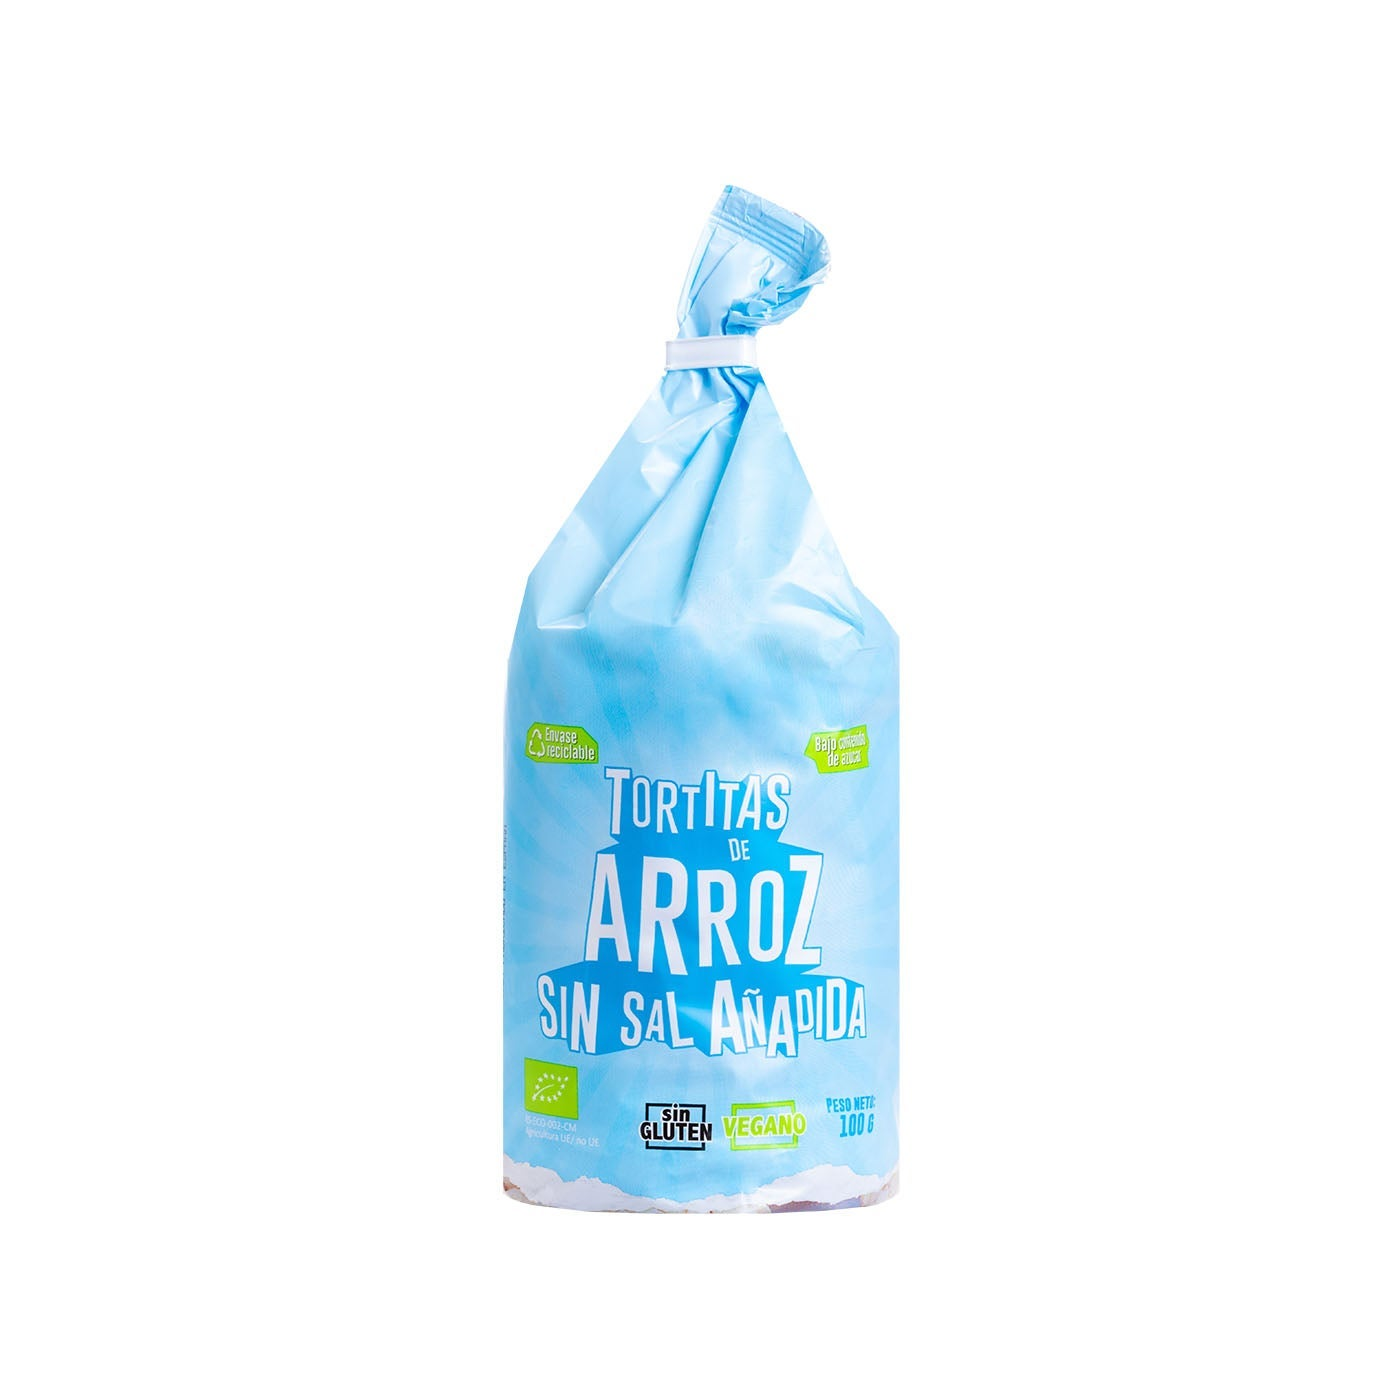

In [20]:
img = PIL.Image.open(r'imagenes_descargadas\99739196_1.jpg')
img

In [21]:
response_image = model.generate_content(img)

Genial. Hemos conseguido que sea capaz de ver la imagen :), aunque claro, está en inglés. Ahora será cuestión de ajustar los prompts para que nos dé lo que más o menos buscamos de las imágenes, que sea lo más descriptivo posible

In [22]:
to_markdown(response_image.text)

> A bag of unsalted rice cakes against a white background. The bag is light blue and has a green label that says "sin gluten" and "vegano". The bag is sealed with a white clip. The text on the bag is in Spanish.

Para esta parte probé muchas iteraciones de cómo obtener las mejores descripciones teniendo en cuenta el contexto de productos comerciales, así que, concluí que pasarle varios prompts especiicando cosas ayudaba a refinar más el resultado

In [23]:


response_description = model.generate_content(['Breve descripción del producto', 'En español', 'Solo di lo más importante en menos de 25 palabras', 'di su color', 'Me gustaría que mentuviese esta estructura de ejemplo: Tortitas de arroz sin sal añadida, veganas y sin gluten. Color: azul claro', img])

Esto está mucho mejor ;)

In [24]:
to_markdown(response_description.text)

> Tortitas de arroz sin sal añadida, veganas y sin gluten. Color: Celeste. 


Bien, ahora llega la prueba de fuego. Alimentaremos el modelo con todas las imágenes del dataframe que tenemos descargado, y empezaremos haciendo una lista con todos los nombres y lo guardaremos en `image_files`

In [25]:
# Ruta a la carpeta que contiene las imágenes
image_folder = './imagenes_descargadas'

# Obtener la lista de archivos de imagen en la carpeta
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

Hacemos una función teniendo el modelo con los mismo prompts. Hay un Exception en caso de que hayan errores individuales

In [26]:
# Función para generar la descripción usando tu modelo
def generate_description(image_path):
    try:
        # Abre la imagen usando PIL
        img = PIL.Image.open(image_path)
        # Generar la descripción usando tu modelo
        response_description = model.generate_content(['Breve descripción del producto', 'En español', 'Solo di lo más importante en menos de 25 palabras', 'di su color','Me gustaría que mentuviese esta estructura de ejemplo: Tortitas de arroz sin sal añadida, veganas y sin gluten. Color: azul claro', img])
        
        # Verificar si la respuesta contiene partes válidas
        if not response_description.parts:
            print(f"No valid parts returned for image: {image_path}")
            return None
        
        return response_description.text
    except Exception as e:
        print(f"Error generating description for image {image_path}: {e}")
        return None


Ahora sí. Creamos un diccionario vacío para guardar las descripciones generadas por cada imagen con un bucle. También eliminamos la carpeta con las imágenes, no querremos llenar nuestra capacidad de disco con futuros productos

In [27]:
# Crear un diccionario para almacenar las descripciones
descriptions = {}

# Generar descripciones para cada imagen
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    description = generate_description(image_path)
    if description:
        descriptions[image_file] = description

#Eliminamos la carpeta de imágenes ahora que ya no nos hace falta
folder_path = './imagenes_descargadas'
# Verifica si la carpeta existe
if os.path.exists(folder_path):
    # Elimina la carpeta y su contenido
    shutil.rmtree(folder_path)
    print(f"La carpeta '{folder_path}' ha sido eliminada.")
else:
    print(f"La carpeta '{folder_path}' no existe.")

No valid parts returned for image: ./imagenes_descargadas\fridge-retro-281l-frigorifico-de-estilo-retro-2.webp
No valid parts returned for image: ./imagenes_descargadas\fridge-retro-281l-frigorifico-de-estilo-retro-3.webp
No valid parts returned for image: ./imagenes_descargadas\fridge-retro-281l-frigorifico-de-estilo-retro-4.webp
No valid parts returned for image: ./imagenes_descargadas\fridge-retro-281l-frigorifico-de-estilo-retro-5.webp
No valid parts returned for image: ./imagenes_descargadas\fridge-retro-281l-frigorifico-de-estilo-retro.webp
No valid parts returned for image: ./imagenes_descargadas\thera-retro-cafetera-express (1).jpg
No valid parts returned for image: ./imagenes_descargadas\thera-retro-cafetera-express (2).jpg
No valid parts returned for image: ./imagenes_descargadas\thera-retro-cafetera-express (3).jpg
No valid parts returned for image: ./imagenes_descargadas\thera-retro-cafetera-express (4).jpg
No valid parts returned for image: ./imagenes_descargadas\thera-ret

Tiene buena pinta, ahora tenemos descripción de las imágenes de los productos

In [28]:
descriptions

{'1713338606_dali_cru__4.2894.jpg': 'Sandalias de esparto con tiras trenzadas para un look casual de verano. Color: blanco roto. \n',
 '99739196_1.jpg': 'Tortitas de arroz sin sal añadida, veganas y sin gluten. Color: Celeste. \n',
 '99739196_2.jpg': 'Tortitas de arroz integral de cultivo ecológico, sin sal añadida. Color: azul claro. \n',
 'DALI_CRU_1_1.jpg': 'Sandalias de esparto con tiras cruzadas y cierre de hebilla. Color: beige. \n',
 'DALI_CRU_2.jpg': 'Alpargatas de lona con puntera descubierta y cierre de hebilla. Color: beige. \n',
 'fridge-retro-281l-frigorifico-de-estilo-retro-10.webp': 'Frigorífico vintage de una puerta con congelador superior. Color: blanco crema. \n',
 'fridge-retro-281l-frigorifico-de-estilo-retro-11.webp': 'Nevera de estilo retro con congelador de 4 estrellas. Color: blanco crema. \n',
 'fridge-retro-281l-frigorifico-de-estilo-retro-12.webp': 'Refrigerador de una puerta con diseño retro, ideal para hogares pequeños. Color: Crema claro. \n',
 'fridge-ret

Se han perdido algunos por el camino. Después de varias iteraciones, no sé por qué ocurre esto. Probé a cambiar de prompts, nombres de archivos, etc, etc. Pero siempre ocurre con los mismo, creo que es algo interno de Gemini, no sabría explicarlo luego de intentar buscar por activa y por pasiva una respeusta

In [29]:
len(descriptions)

62

Usaremos la sigueinte función para dejar mejor limpio el diccionario que contiene los textos generados

In [30]:
# Función para limpiar texto
def limpiar_texto(texto):
    # Reemplazar saltos de línea y espacios en blanco adicionales
    texto = re.sub(r'\n+', ' ', texto)  # Reemplazar múltiples saltos de línea por un solo espacio
    texto = re.sub(r'\s+', ' ', texto)  # Reemplazar múltiples espacios por un solo espacio
    
    # Eliminar caracteres especiales innecesarios
    texto = re.sub(r'\*+', '', texto)  # Eliminar asteriscos
    texto = re.sub(r'<[^>]*>', '', texto)  # Eliminar etiquetas HTML
    texto = re.sub(r'\*\*([^*]+)\*\*', r'\1', texto)  # Eliminar negritas de Markdown (si es necesario)
    texto = re.sub(r'_{2,}([^_]+)_{2,}', r'\1', texto)  # Eliminar subrayado de Markdown (si es necesario)
    
    # Limpiar comillas y apóstrofes
    texto = re.sub(r'[\'"]', '', texto)  # Eliminar comillas simples y dobles
    
    # Eliminar texto entre paréntesis (opcional)
    texto = re.sub(r'\(.*?\)', '', texto)  # Eliminar texto entre paréntesis

    return texto.strip()

In [31]:
diccionario_limpio = {clave: limpiar_texto(valor) for clave, valor in descriptions.items()}

In [32]:
diccionario_limpio

{'1713338606_dali_cru__4.2894.jpg': 'Sandalias de esparto con tiras trenzadas para un look casual de verano. Color: blanco roto.',
 '99739196_1.jpg': 'Tortitas de arroz sin sal añadida, veganas y sin gluten. Color: Celeste.',
 '99739196_2.jpg': 'Tortitas de arroz integral de cultivo ecológico, sin sal añadida. Color: azul claro.',
 'DALI_CRU_1_1.jpg': 'Sandalias de esparto con tiras cruzadas y cierre de hebilla. Color: beige.',
 'DALI_CRU_2.jpg': 'Alpargatas de lona con puntera descubierta y cierre de hebilla. Color: beige.',
 'fridge-retro-281l-frigorifico-de-estilo-retro-10.webp': 'Frigorífico vintage de una puerta con congelador superior. Color: blanco crema.',
 'fridge-retro-281l-frigorifico-de-estilo-retro-11.webp': 'Nevera de estilo retro con congelador de 4 estrellas. Color: blanco crema.',
 'fridge-retro-281l-frigorifico-de-estilo-retro-12.webp': 'Refrigerador de una puerta con diseño retro, ideal para hogares pequeños. Color: Crema claro.',
 'fridge-retro-281l-frigorifico-de-e

Es hora de agregar las desccripciones a nuestro dataframe

In [33]:
merge_df['description'] = merge_df['filename'].map(diccionario_limpio)

In [34]:
merge_df

,sku,template,name,url,filename,position,is_main_image,description
0,99739196,Decor Products,"""Bolsa de Arroz Étnica""",https://demo.ui.smartie.io/medias/image/f567/9...,99739196_1.jpg,1,True,"Tortitas de arroz sin sal añadida, veganas y s..."
1,99739196,Decor Products,"""Bolsa de Arroz Étnica""",https://demo.ui.smartie.io/medias/image/7e76/9...,99739196_2.jpg,2,False,Tortitas de arroz integral de cultivo ecológic...
2,C-161260-Arena,Decoracion,Arena Retro Café,https://demo.ui.smartie.io/medias/image/2786/t...,thera-retro-cafetera-express (4).webp,1,False,Portafiltro de café profesional con mango de m...
3,C-161260-Arena,Decoracion,Arena Retro Café,https://demo.ui.smartie.io/medias/image/8804/t...,thera-retro-cafetera-express (3).webp,2,False,"Cafetera espresso manual con vaporizador, comp..."
4,C-161260-Arena,Decoracion,Arena Retro Café,https://demo.ui.smartie.io/medias/image/7b33/t...,thera-retro-cafetera-express (2).webp,3,False,"Cafetera espresso con molinillo integrado, par..."
...,...,...,...,...,...,...,...,...
68,S-226841-negro,Decoracion Nevera,RetroCooler Noir,https://demo.ui.smartie.io/medias/image/e71e/f...,fridge-retro-281l-frigorifico-de-estilo-retro-...,3,False,NaN
69,S-226841-negro,Decoracion Nevera,RetroCooler Noir,https://demo.ui.smartie.io/medias/image/cfbd/f...,fridge-retro-281l-frigorifico-de-estilo-retro-...,4,False,NaN
70,S-226841-negro,Decoracion Nevera,RetroCooler Noir,https://demo.ui.smartie.io/medias/image/10c3/f...,fridge-retro-281l-frigorifico-de-estilo-retro-...,5,False,NaN
71,S-226841-negro,Decoracion Nevera,RetroCooler Noir,https://demo.ui.smartie.io/medias/image/5d5c/f...,fridge-retro-281l-frigorifico-de-estilo-retro-...,6,False,Recipientes de vidrio para alimentos con tapas...


Ahora guardamos el dataframe como archivo csv y ya estaría ;)

In [37]:
# Guardar el DataFrame 'merge_df' en un archivo CSV
merge_df.to_csv('product-images-with-description.csv')

## Conclusiones Finales:

- **Automatización del Enriquecimiento de Información**: La implementación de un modelo de lenguaje generativo como Gemini 1.5 pro ha demostrado ser efectiva para enriquecer la información de productos mediante descripciones detalladas y precisas basadas en imágenes.

- **Integración de Visión Artificial**: La utilización de técnicas de visión artificial para analizar imágenes de productos y generar descripciones ha permitido mejorar la calidad y la cantidad de información disponible, facilitando así la toma de decisiones.

- **Desafíos y Soluciones**: A lo largo del proceso, se identificaron varios desafíos, como la pérdida de algunas descripciones generadas. Sin embargo, se implementaron soluciones como la limpieza de texto y la iteración de prompts para mejorar los resultados.

- **Optimización del Proceso**: La automatización del proceso de descarga y análisis de imágenes, así como la integración con la API de Gemini, ha permitido optimizar el flujo de trabajo, reduciendo el tiempo y los recursos necesarios para obtener descripciones de alta calidad.

- **Resultados Satisfactorios**: A pesar de algunos inconvenientes, los resultados obtenidos han sido satisfactorios, logrando generar descripciones precisas y útiles para la mayoría de los productos analizados.

- **Recomendaciones Futuras**: Se recomienda continuar explorando y ajustando los prompts y parámetros del modelo para mejorar aún más la precisión y la cobertura de las descripciones generadas. Además, considerar la integración de otros modelos de lenguaje y técnicas de análisis para diversificar y enriquecer aún más la información de los productos.

Aclarar que todo esto me ha permitido aprendido muchísimo. Quiero agradecer a Onestic por la oportunidad de la prueba ténica ;)